## 火車站進出站總人數


```
透過政府資料開放平台取得json資料
取出進站人數和出站人數超過500000人次的火車站
https://data.gov.tw/datasets/search?qs=%E6%AF%8F%E6%97%A5%E5%90%84%E7%AB%99%E9%80%B2%E5%87%BA%E7%AB%99%E4%BA%BA%E6%95%B8
```

In [1]:
%matplotlib notebook
import urllib3
import certifi
import json 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='/Library/Fonts/Arial Unicode.ttf',size=8)
#下載進出站人數資料
jsonUrl = 'http://ods.railway.gov.tw/tra-ods-web/ods/download/dataResource/8ae4cabf6973990e0169947ed32454b9'

#透過requests.get()方法取得requests.responces物件
http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())
r = http.request('GET', jsonUrl)

if r.status == 200:
    #使用json.loads()方法,取得python的list物件
    jsObject = json.loads(r.data)
else:
    print('下載錯誤')


In [2]:
#將list物件轉換為DataFrame
frame = pd.DataFrame(jsObject)

#取得的資料只有火車站的code,沒有站名,必需再下載火車站名的資料
frame

,trnOpDate,staCode,gateInComingCnt,gateOutGoingCnt
0,20190423,0900,8437,7739
1,20190423,0910,1393,1347
2,20190423,0920,2756,2416
3,20190423,0930,6086,6306
4,20190423,0940,2677,2723
...,...,...,...,...
88852,20200429,7360,3131,3209
88853,20200429,7361,19,23
88854,20200429,7362,85,94
88855,20200429,7380,608,592


In [3]:
#下載火車站資料
staCode_url = 'http://ods.railway.gov.tw/tra-ods-web/ods/download/dataResource/0518b833e8964d53bfea3f7691aea0ee'
http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())
r = http.request('GET', staCode_url)
staCode_jsObject = json.loads(r.data)
staCode_jsObject

#下載的火車站資料,過濾資料,只要取出火車站code,火車站名,火車站的地址
staCode_frame = pd.DataFrame(staCode_jsObject,columns=['stationCode', 'stationName','stationAddrTw'])
staCode_frame

,stationCode,stationName,stationAddrTw
0,0900,基隆,基隆市中山區民治里1鄰中山一路16之 1號
1,0910,三坑,基隆市仁愛區德厚里龍安街 206 號
2,0920,八堵,基隆市暖暖區八南里八堵路 142 號
3,0930,七堵,基隆市七堵區長興里東新街 2 號
4,0940,百福,基隆市七堵區堵南里明德三路 1 之 1 號
...,...,...,...
236,7360,瑞芳,新北市瑞芳區龍潭里明燈路三段 82 號
237,7361,海科館,基隆市中正區長潭里
238,7362,八斗子,基隆市中正區砂子里省道臺 2 線 (與新北市瑞芳區交界處、無站房)
239,7380,四腳亭,新北市瑞芳區吉慶里中央路 65 號


In [4]:
#僅取出火車站地址內的縣市資料
#利用DataFrame的apply()方法,取出每一個series
#利用索引名程取出地址,取出前3字
#由於其中有一筆資料是空的，split()時會raise exception, 使用try except來排除錯誤

def county(x):
    try:
        x['stationAddrTw'] = x['stationAddrTw'][:3]
        return x;
    except:
        pass;    

staCode_frame = staCode_frame.apply(county,axis=1)
staCode_frame.dropna(inplace=True)
staCode_frame.head(20)

,stationCode,stationName,stationAddrTw
0,0900,基隆,基隆市
1,0910,三坑,基隆市
2,0920,八堵,基隆市
3,0930,七堵,基隆市
4,0940,百福,基隆市
5,0950,五堵,新北市
6,0960,汐止,新北市
7,0970,汐科,新北市
8,0980,南港,臺北市
9,0990,松山,臺北市


In [5]:
#使用pd.merge()方法將frame和staCode_frame做left_join
mergeFrame = pd.merge(frame,staCode_frame,left_on='staCode',right_on='stationCode',how='left')
mergeFrame

,trnOpDate,staCode,gateInComingCnt,gateOutGoingCnt,stationCode,stationName,stationAddrTw
0,20190423,0900,8437,7739,0900,基隆,基隆市
1,20190423,0910,1393,1347,0910,三坑,基隆市
2,20190423,0920,2756,2416,0920,八堵,基隆市
3,20190423,0930,6086,6306,0930,七堵,基隆市
4,20190423,0940,2677,2723,0940,百福,基隆市
...,...,...,...,...,...,...,...
88852,20200429,7360,3131,3209,7360,瑞芳,新北市
88853,20200429,7361,19,23,7361,海科館,基隆市
88854,20200429,7362,85,94,7362,八斗子,基隆市
88855,20200429,7380,608,592,7380,四腳亭,新北市


In [6]:
#將日期欄位資料類型改為datetime
mergeFrame['trnOpDate'] = mergeFrame['trnOpDate'].map(lambda x:datetime.strptime(x,'%Y%m%d'))

In [7]:
#檢查類型是否有改變
mergeFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88857 entries, 0 to 88856
Data columns (total 7 columns):
trnOpDate          88857 non-null datetime64[ns]
staCode            88857 non-null object
gateInComingCnt    88857 non-null object
gateOutGoingCnt    88857 non-null object
stationCode        88857 non-null object
stationName        88857 non-null object
stationAddrTw      88857 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 5.4+ MB


In [8]:
#將進入人數改為int類型
mergeFrame['gateInComingCnt'] = mergeFrame['gateInComingCnt'].map(lambda x:int(x))

In [9]:
#使用astype改為int類型
mergeFrame['gateOutGoingCnt'] = mergeFrame['gateOutGoingCnt'].map(lambda x:int(x))
mergeFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88857 entries, 0 to 88856
Data columns (total 7 columns):
trnOpDate          88857 non-null datetime64[ns]
staCode            88857 non-null object
gateInComingCnt    88857 non-null int64
gateOutGoingCnt    88857 non-null int64
stationCode        88857 non-null object
stationName        88857 non-null object
stationAddrTw      88857 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.4+ MB


In [10]:
#使用reindex取出想要的欄位
mergeFrame = mergeFrame.reindex(columns=['trnOpDate','stationName','stationAddrTw', 'gateInComingCnt','gateOutGoingCnt'])
mergeFrame

,trnOpDate,stationName,stationAddrTw,gateInComingCnt,gateOutGoingCnt
0,2019-04-23,基隆,基隆市,8437,7739
1,2019-04-23,三坑,基隆市,1393,1347
2,2019-04-23,八堵,基隆市,2756,2416
3,2019-04-23,七堵,基隆市,6086,6306
4,2019-04-23,百福,基隆市,2677,2723
...,...,...,...,...,...
88852,2020-04-29,瑞芳,新北市,3131,3209
88853,2020-04-29,海科館,基隆市,19,23
88854,2020-04-29,八斗子,基隆市,85,94
88855,2020-04-29,四腳亭,新北市,608,592


In [11]:
mergeFrame.columns = ['日期','站名', '縣市','進站數量','出站數量']
mergeFrame

,日期,站名,縣市,進站數量,出站數量
0,2019-04-23,基隆,基隆市,8437,7739
1,2019-04-23,三坑,基隆市,1393,1347
2,2019-04-23,八堵,基隆市,2756,2416
3,2019-04-23,七堵,基隆市,6086,6306
4,2019-04-23,百福,基隆市,2677,2723
...,...,...,...,...,...
88852,2020-04-29,瑞芳,新北市,3131,3209
88853,2020-04-29,海科館,基隆市,19,23
88854,2020-04-29,八斗子,基隆市,85,94
88855,2020-04-29,四腳亭,新北市,608,592


In [12]:
sumFrame=mergeFrame.groupby(['縣市','站名']).sum()
sumFrame

進站數量     出站數量
縣市  站名                   
南投縣 水里     65038    66689
    濁水     49671    45301
    車埕    160316   198661
    集集    167122   135009
    龍泉      5889     6913
...          ...      ...
高雄市 美術館   316942   306607
    路竹    621865   640558
    高雄   5868789  5872208
    鳳山   1859198  1814101
    鼓山     72847    75532

[239 rows x 2 columns]

In [13]:
#使用concat結合進站數量>=5000000 boolean的series,和出站數量>=5000000 boolean的series
conditions = pd.concat([sumFrame['進站數量'] >= 5000000, sumFrame['出站數量'] >= 5000000],axis=1)

#使用dataFrame的boolean方法all()或 any()取得seriese boolean
andCondition = conditions.all(axis=1)
andCondition

縣市   站名 
南投縣  水里     False
     濁水     False
     車埕     False
     集集     False
     龍泉     False
            ...  
高雄市  美術館    False
     路竹     False
     高雄      True
     鳳山     False
     鼓山     False
Length: 239, dtype: bool

In [14]:
result = sumFrame[andCondition]
result

進站數量      出站數量
縣市  站名                    
彰化縣 彰化   5179445   5319155
新北市 板橋   7832880   7841910
    樹林   5358838   5340391
新竹市 新竹   7162593   7223557
桃園市 中壢   9552066   9663534
    桃園  10005609  10305894
臺中市 臺中   9250612   9144348
臺北市 松山   5954293   5886167
    臺北  22140557  21933334
臺南市 臺南   9342167   9495844
花蓮縣 花蓮   5428749   5214244
高雄市 高雄   5868789   5872208

<IPython.core.display.Javascript object>


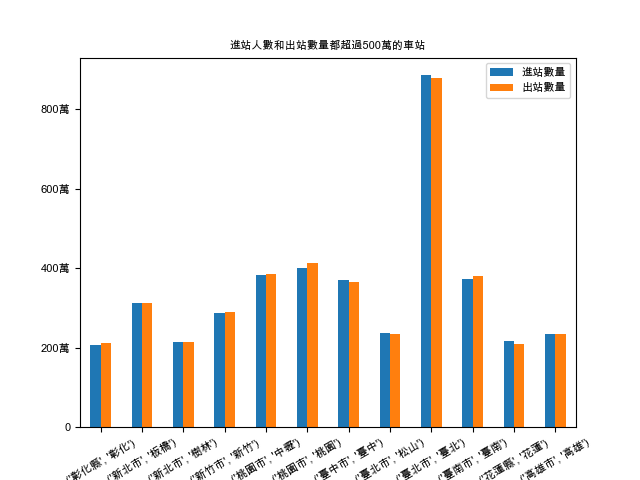

[Text(0, 0, '0'),
 Text(0, 0, '200萬'),
 Text(0, 0, '400萬'),
 Text(0, 0, '600萬'),
 Text(0, 0, '800萬'),
 Text(0, 0, '1000萬')]

In [15]:
figure1, ax1 = plt.subplots() #使用pyplot的subplots()建立單獨figure和AxesSubplot
result.plot(ax = ax1, kind='bar')
ax1.legend(prop=font)
ax1.set_title('進站人數和出站數量都超過500萬的車站',fontproperties=font)
ax1.set_xticklabels(result.index,fontproperties=font,rotation=30)
ax1.set_yticklabels(['0','200萬','400萬', '600萬', '800萬','1000萬', '1200萬', '1400萬', '1600萬'],fontproperties=font)